In [1]:
import warnings
warnings.filterwarnings('ignore')
# Importing Libraries required
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as stats
import datetime
from datetime import date as dt
from datetime import time
from datetime import timedelta

## Business Objectives

This is exploratory data Analysis of one of the Lending Firms. This company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface. 

    "Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). The credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who default cause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'."

If one is able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss.

Here we are trying to identify the driving factors behind being a loan defaulters. This can help the firm use its prior knowledge, do a proper risk assessment and reduce the credit loss as much as possible.

## Loading and Inspecting the Data Set

In [2]:
loans = pd.read_csv('./loan.csv',sep=",",quotechar='"')

In [3]:
print(len(loans.index))
print(loans.shape)
loans.info()

39717
(39717, 111)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


## Data Cleaning

In [4]:
# Unique values in Each Column
loans.nunique()

id                                39717
member_id                         39717
loan_amnt                           885
funded_amnt                        1041
funded_amnt_inv                    8205
term                                  2
int_rate                            371
installment                       15383
grade                                 7
sub_grade                            35
emp_title                         28820
emp_length                           11
home_ownership                        5
annual_inc                         5318
verification_status                   3
issue_d                              55
loan_status                           3
pymnt_plan                            1
url                               39717
desc                              26527
purpose                              14
title                             19615
zip_code                            823
addr_state                           50
dti                                2868


In [5]:
# Check % of Nulls in Each Column
round(100*loans.isnull().sum()/len(loans.index),2).sort_values(ascending = False)

total_il_high_credit_limit     100.0
mo_sin_old_rev_tl_op           100.0
bc_util                        100.0
bc_open_to_buy                 100.0
avg_cur_bal                    100.0
acc_open_past_24mths           100.0
inq_last_12m                   100.0
total_cu_tl                    100.0
inq_fi                         100.0
total_rev_hi_lim               100.0
all_util                       100.0
max_bal_bc                     100.0
open_rv_24m                    100.0
open_rv_12m                    100.0
il_util                        100.0
total_bal_il                   100.0
mths_since_rcnt_il             100.0
open_il_24m                    100.0
open_il_12m                    100.0
open_il_6m                     100.0
open_acc_6m                    100.0
tot_cur_bal                    100.0
tot_coll_amt                   100.0
total_bc_limit                 100.0
dti_joint                      100.0
annual_inc_joint               100.0
mths_since_last_major_derog    100.0
m

#### Dropping columns with Null values of 90%

In [6]:
loans_drop = loans.loc[:,(100*loans.isnull().sum()/len(loans.index)) >= 90].columns

In [7]:
loan_data = loans.drop(loans_drop, axis=1)
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [8]:
round(100*loan_data.isnull().sum()/len(loan_data.index),2).sort_values(ascending=False) 

mths_since_last_delinq        64.66
desc                          32.58
emp_title                      6.19
emp_length                     2.71
pub_rec_bankruptcies           1.75
last_pymnt_d                   0.18
chargeoff_within_12_mths       0.14
collections_12_mths_ex_med     0.14
revol_util                     0.13
tax_liens                      0.10
title                          0.03
last_credit_pull_d             0.01
term                           0.00
loan_status                    0.00
purpose                        0.00
member_id                      0.00
loan_amnt                      0.00
funded_amnt                    0.00
url                            0.00
pymnt_plan                     0.00
funded_amnt_inv                0.00
issue_d                        0.00
int_rate                       0.00
verification_status            0.00
annual_inc                     0.00
home_ownership                 0.00
addr_state                     0.00
sub_grade                   

Observing that we still have few columns with Null values. Dropping them for ease of analysis

In [9]:
# Increasing the dropping NUll % to 30%
loans_drop = loans.loc[:,(100*loans.isnull().sum()/len(loans.index)) >= 30].columns
loan_data = loans.drop(loans_drop, axis=1)
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [10]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 53 columns):
id                            39717 non-null int64
member_id                     39717 non-null int64
loan_amnt                     39717 non-null int64
funded_amnt                   39717 non-null int64
funded_amnt_inv               39717 non-null float64
term                          39717 non-null object
int_rate                      39717 non-null object
installment                   39717 non-null float64
grade                         39717 non-null object
sub_grade                     39717 non-null object
emp_title                     37258 non-null object
emp_length                    38642 non-null object
home_ownership                39717 non-null object
annual_inc                    39717 non-null float64
verification_status           39717 non-null object
issue_d                       39717 non-null object
loan_status                   39717 non-null object
pymnt_pl

In [11]:
round(100*loan_data.isnull().sum()/len(loan_data.index),2).sort_values(ascending=False)

emp_title                     6.19
emp_length                    2.71
pub_rec_bankruptcies          1.75
last_pymnt_d                  0.18
collections_12_mths_ex_med    0.14
chargeoff_within_12_mths      0.14
revol_util                    0.13
tax_liens                     0.10
title                         0.03
last_credit_pull_d            0.01
annual_inc                    0.00
pymnt_plan                    0.00
url                           0.00
purpose                       0.00
loan_status                   0.00
issue_d                       0.00
verification_status           0.00
sub_grade                     0.00
home_ownership                0.00
addr_state                    0.00
grade                         0.00
installment                   0.00
int_rate                      0.00
term                          0.00
funded_amnt_inv               0.00
funded_amnt                   0.00
loan_amnt                     0.00
member_id                     0.00
zip_code            

In [12]:
#loan_data.to_csv('clean_loan_data.csv')

In [13]:
loan_data.nunique()

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     28820
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           39717
purpose                          14
title                         19615
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths                    9
open_acc                    

In [14]:
#Check all the columns which have only 1 unique value
loan_data.loc[:,loan_data.nunique()==1].columns

#Drop these columns as they don't add any value to our dependent variables
loan_data = loan_data.drop(loan_data.loc[:,loan_data.nunique()==1].columns, axis = 1)

In [15]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 44 columns):
id                         39717 non-null int64
member_id                  39717 non-null int64
loan_amnt                  39717 non-null int64
funded_amnt                39717 non-null int64
funded_amnt_inv            39717 non-null float64
term                       39717 non-null object
int_rate                   39717 non-null object
installment                39717 non-null float64
grade                      39717 non-null object
sub_grade                  39717 non-null object
emp_title                  37258 non-null object
emp_length                 38642 non-null object
home_ownership             39717 non-null object
annual_inc                 39717 non-null float64
verification_status        39717 non-null object
issue_d                    39717 non-null object
loan_status                39717 non-null object
url                        39717 non-null object
purpose   

In [16]:
loan_data.nunique().sort_values()

term                           2
pub_rec_bankruptcies           3
loan_status                    3
verification_status            3
pub_rec                        5
home_ownership                 5
grade                          7
inq_last_6mths                 9
delinq_2yrs                   11
emp_length                    11
purpose                       14
sub_grade                     35
open_acc                      40
addr_state                    50
issue_d                       55
total_acc                     82
last_pymnt_d                 101
last_credit_pull_d           106
int_rate                     371
earliest_cr_line             526
zip_code                     823
loan_amnt                    885
funded_amnt                 1041
revol_util                  1089
out_prncp                   1137
out_prncp_inv               1138
total_rec_late_fee          1356
collection_recovery_fee     2616
dti                         2868
recoveries                  4040
annual_inc

In [17]:
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0


### Data - Value Cleaning

Looking at the data at hand, cleaning up some of the columns to make them compatible for analysis.

In [18]:
# Converting date columns to Appropriate data 
from datetime import datetime
def date_func(x):
    return datetime.strptime(x, '%b-%y')
loan_data['issue_d']=loan_data['issue_d'].apply(date_func)


In [19]:
# Cleaning the 'term' column to remove the ' months' string from it to convert it to numeric
loan_data['term_in_months']=loan_data['term'].replace(to_replace = ' months', value = '', regex = True)
loan_data['term_in_months'] = pd.to_numeric(loan_data['term_in_months'])

In [20]:
# Convert the 'int_rate' column from percentage to decimal format
loan_data['int_rate'].replace(to_replace = '%', value = '', regex = True, inplace = True)
loan_data['int_rate'] = pd.to_numeric(loan_data['int_rate'])/100

In [21]:
#Inspect the 'emp_length' column
print(loan_data['emp_length'].value_counts())

loan_data['emp_len_in_yrs'] = loan_data['emp_length']

# Convert the column to numeric - change '< 1 year' to 0 and '10+ years' to 10
loan_data['emp_len_in_yrs'] = loan_data['emp_len_in_yrs'].replace(to_replace = '< 1 year', value = '0', regex = True)
loan_data['emp_len_in_yrs'] = loan_data['emp_len_in_yrs'].replace(to_replace = ' years', value = '', regex = True)
loan_data['emp_len_in_yrs'] = loan_data['emp_len_in_yrs'].replace(to_replace = ' year', value = '', regex = True)
loan_data['emp_len_in_yrs'] = loan_data['emp_len_in_yrs'].replace(to_replace = '[+]', value = '', regex = True)

##loan_data['emp_len_in_yrs'] = pd.to_numeric(loan_data['emp_len_in_yrs'])
print(loan_data['emp_len_in_yrs'].value_counts())
loan_data['emp_len_in_yrs'] = pd.to_numeric(loan_data['emp_len_in_yrs'])

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64
10    8879
0     4583
2     4388
3     4095
4     3436
5     3282
1     3240
6     2229
7     1773
8     1479
9     1258
Name: emp_len_in_yrs, dtype: int64


In [22]:
# Convert the 'revol_util' column from percentage to decimal format
loan_data['revol_util'].replace(to_replace = '%', value = '', regex = True, inplace = True)
loan_data['revol_util'] = pd.to_numeric(loan_data['revol_util'])/100

In [23]:
# Creating income groups for Annual Income
def sal_group(sal):
    if sal <= 50000:
        return '< 50000'
    elif sal > 50000 and sal <= 100000:
        return '50 K - 1 Lakh'
    elif sal > 100000 and sal <= 150000:
        return '1 lakh - 1 L 50 K'
    elif sal > 150000 and sal <= 200000:
        return '1 L 50 K - 2 Lakhs'
    elif sal > 200000 and sal <= 300000:
        return '2 Lakhs - 3 Lakhs'
    elif sal > 300000 and sal <= 400000:
        return '3 Lakhs - 4 Lakhs'
    elif sal > 400000 and sal <= 600000:
        return '4 Lakhs - 6 Lakhs'
    elif sal > 600000:
        return '> 6 Lakhs'
    else: 
        return 'No Sal Data'

loan_data['annual_inc_group'] = loan_data.annual_inc.apply(sal_group)
    

In [77]:
# Creating the Interest Rate Groups
def int_group_func(x):
    if x <= 10:
        return '5 - 10 %'
    elif 10 < x <= 15:
        return '10 - 15 %'
    elif 15 < x <= 20:
        return '15 - 20 %'
    elif 20 < x <= 25:
        return '20 - 25 %'
    else:
        return '> 25%'

loan_data['int_rate_group'] = round(loan_data['int_rate']*100,2)
loan_data['int_rate_group'] = loan_data['int_rate_group'].apply(int_group_func)
loan_data['int_rate_group'].value_counts()


10 - 15 %    18794
5 - 10 %     12393
15 - 20 %     7658
20 - 25 %      872
Name: int_rate_group, dtype: int64

In [25]:
# Splitting Issue Date into Month and Year columns for further analysis
loan_data["issue_d_mnth"] = loan_data.issue_d.dt.month
loan_data["issue_d_yr"] =  loan_data.issue_d.dt.year

In [26]:
# Creating the DTI Groups
def dti_group_func(x):
    if x <= 5:
        return '< 5'
    elif 5 < x <= 10:
        return '5 - 10'
    elif 10 < x <= 15:
        return '10 - 15'
    elif 15 < x <= 20:
        return '15 - 20'
    else:
        return '> 20'

loan_data['dti_group'] = loan_data['dti'].apply(dti_group_func)

In [27]:
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,term_in_months,emp_len_in_yrs,annual_inc_group,int_rate_group,issue_d_mnth,issue_d_yr,dti_group
0,1077501,1296599,5000,5000,4975.0,36 months,0.1065,162.87,B,B2,...,171.62,May-16,0.0,36,10.0,< 50000,10 - 15 %,12,2011,> 20
1,1077430,1314167,2500,2500,2500.0,60 months,0.1527,59.83,C,C4,...,119.66,Sep-13,0.0,60,0.0,< 50000,15 - 20 %,12,2011,< 5
2,1077175,1313524,2400,2400,2400.0,36 months,0.1596,84.33,C,C5,...,649.91,May-16,0.0,36,10.0,< 50000,15 - 20 %,12,2011,5 - 10
3,1076863,1277178,10000,10000,10000.0,36 months,0.1349,339.31,C,C1,...,357.48,Apr-16,0.0,36,10.0,< 50000,10 - 15 %,12,2011,15 - 20
4,1075358,1311748,3000,3000,3000.0,60 months,0.1269,67.79,B,B5,...,67.79,May-16,0.0,60,1.0,50 K - 1 Lakh,10 - 15 %,12,2011,15 - 20


Dropping Unnecessary Columns which are not used in the analysis.

In [28]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 51 columns):
id                         39717 non-null int64
member_id                  39717 non-null int64
loan_amnt                  39717 non-null int64
funded_amnt                39717 non-null int64
funded_amnt_inv            39717 non-null float64
term                       39717 non-null object
int_rate                   39717 non-null float64
installment                39717 non-null float64
grade                      39717 non-null object
sub_grade                  39717 non-null object
emp_title                  37258 non-null object
emp_length                 38642 non-null object
home_ownership             39717 non-null object
annual_inc                 39717 non-null float64
verification_status        39717 non-null object
issue_d                    39717 non-null datetime64[ns]
loan_status                39717 non-null object
url                        39717 non-null object
p

In [29]:
loan_data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies', 'term_in_months', 'emp_len_in_yrs',
       'annual_inc_group', 'int_rate_group', 'issue_d_mnth', 'issue_d_yr',
       'dti_group'],
      dtype='object')

`Based on description, deleting unwanted columns and retaining only required columns for analysis`

In [30]:
loan_data_req_columns = ['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status',  'purpose',  'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 
        'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 
       'pub_rec_bankruptcies', 'term_in_months', 'emp_len_in_yrs',
       'annual_inc_group', 'int_rate_group', 'issue_d_mnth', 'issue_d_yr', 'dti_group']

In [31]:
loan_cd = loan_data[loan_data_req_columns]
loan_cd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 45 columns):
id                         39717 non-null int64
member_id                  39717 non-null int64
loan_amnt                  39717 non-null int64
funded_amnt                39717 non-null int64
funded_amnt_inv            39717 non-null float64
term                       39717 non-null object
int_rate                   39717 non-null float64
installment                39717 non-null float64
grade                      39717 non-null object
sub_grade                  39717 non-null object
emp_length                 38642 non-null object
home_ownership             39717 non-null object
annual_inc                 39717 non-null float64
verification_status        39717 non-null object
issue_d                    39717 non-null datetime64[ns]
loan_status                39717 non-null object
purpose                    39717 non-null object
zip_code                   39717 non-null object
a

In [32]:
#loan_data.to_csv('clean_loan_data.csv')

In [33]:
numerical_cols = loan_cd.dtypes[loan_cd.dtypes != "object"].index
print("# of Numerical columns: ", len(numerical_cols))
print('--------')
categorical_cols = loan_cd.dtypes[loan_cd.dtypes == "object"].index
print("# of Categorical columns: ", len(categorical_cols))
print('--------')

# of Numerical columns:  31
--------
# of Categorical columns:  14
--------


Completed above is the data cleaning and preparation

### Univariate Analysis
The section below will now involve observing the variables one after the other individually

[Text(0,0.5,'Count'), Text(0.5,0,'DTI')]

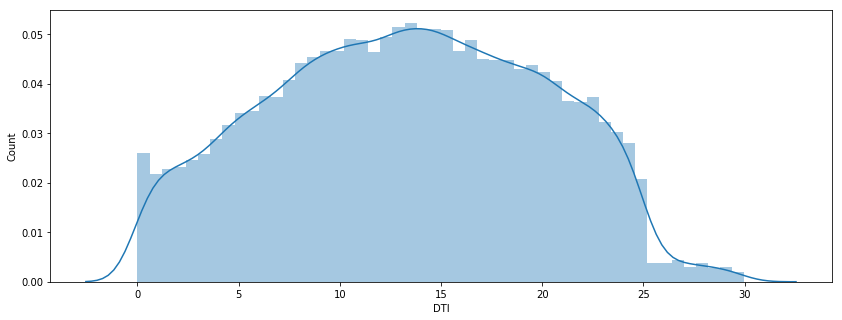

In [34]:
# Distribution plot for dti
plt.figure(figsize=(14,5))
fig = sns.distplot(loan_cd['dti'])
fig.set(xlabel='DTI',ylabel='Count')

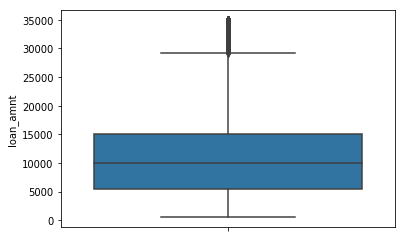

In [35]:
sns.boxplot(y='loan_amnt',data=loan_cd)

`We see that 75% of loans are taken less than 15000. However, there are outliers who take more 30000 loan`. We are not removing the outliers, to make sure they are also included for the analysis

In [36]:
loan_cd['annual_inc_group'].value_counts()

50 K - 1 Lakh         18286
< 50000               15744
1 lakh - 1 L 50 K      4136
1 L 50 K - 2 Lakhs      965
2 Lakhs - 3 Lakhs       411
3 Lakhs - 4 Lakhs        83
> 6 Lakhs                49
4 Lakhs - 6 Lakhs        43
Name: annual_inc_group, dtype: int64

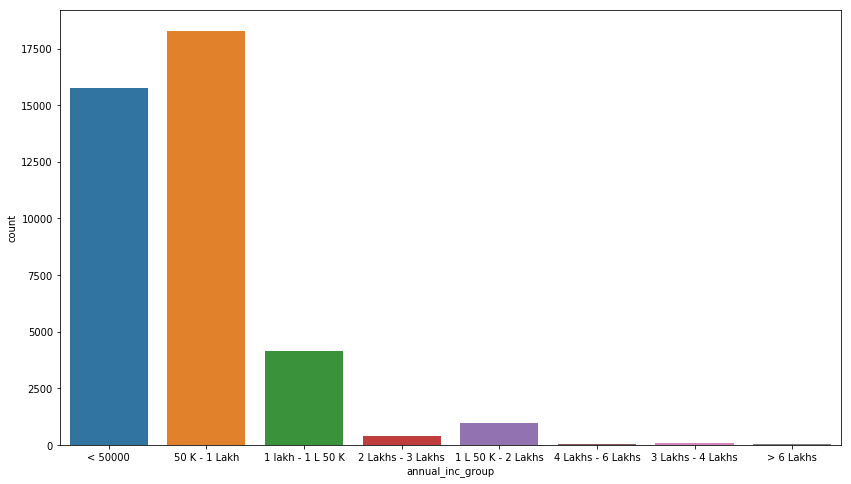

In [37]:
plt.figure(figsize=(14, 8))
sns.countplot(x='annual_inc_group',data=loan_cd)

In [38]:
loan_cd.int_rate_group.value_counts()

10 - 15 %    18794
5 - 10 %     12393
15 - 20 %     7658
20 - 25 %      872
Name: int_rate_group, dtype: int64

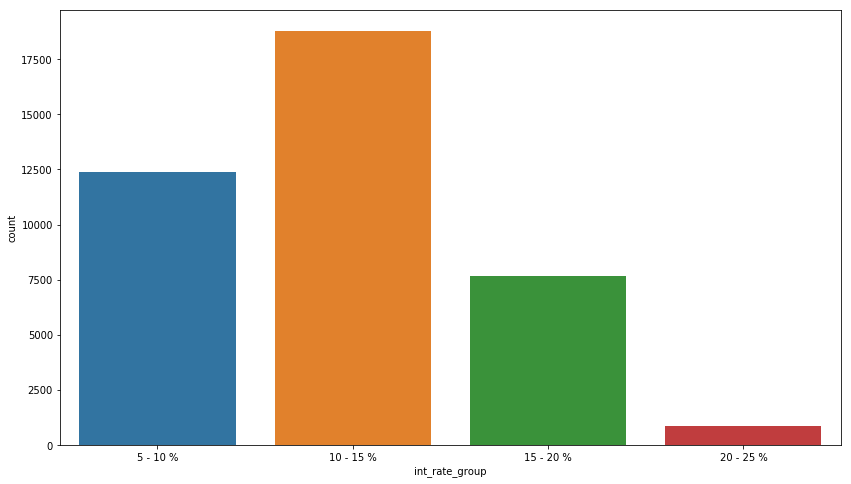

In [39]:
plt.figure(figsize=(14, 8))
sns.countplot(x='int_rate_group',data=loan_cd, order=['5 - 10 %','10 - 15 %','15 - 20 %','20 - 25 %'])

In [40]:
loan_cd['loan_status'].value_counts()/len(loan_cd.index)*100

Fully Paid     82.961956
Charged Off    14.167737
Current         2.870307
Name: loan_status, dtype: float64

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64


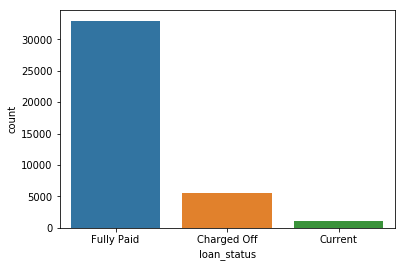

In [41]:
print(loan_cd['loan_status'].value_counts())
sns.countplot(x='loan_status', data=loan_cd)

` As we see 14% of the loans are charged off`

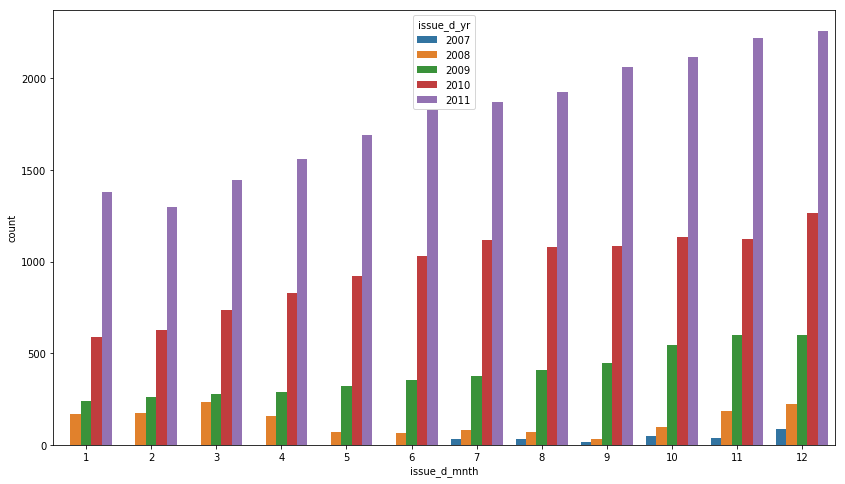

In [87]:
plt.figure(figsize=(14, 8))
sns.countplot(x='issue_d_mnth',hue='issue_d_yr', data=loan_cd)

`As we see, December is the busiest month where most of the loans are applied`

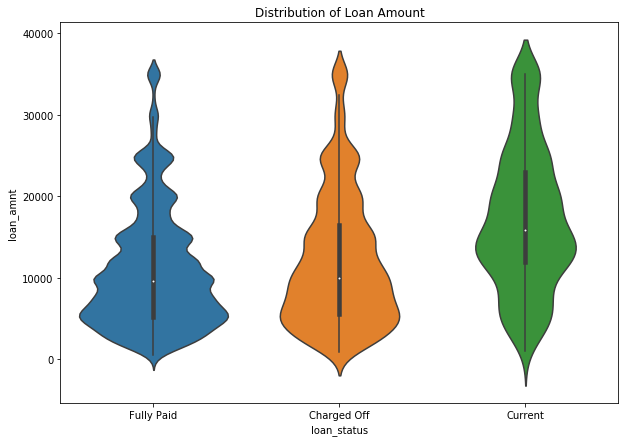

In [42]:
plt.figure(figsize=(10,7))
plt.title("Distribution of Loan Amount")
sns.violinplot(x="loan_status", y="loan_amnt", data=loan_cd);
plt.show()

In [88]:
loan_cd['term'].value_counts()

 36 months    29096
 60 months    10621
Name: term, dtype: int64

In [89]:
def countplt(dim):
    sns.countplot(x=dim,data=loan_cd)

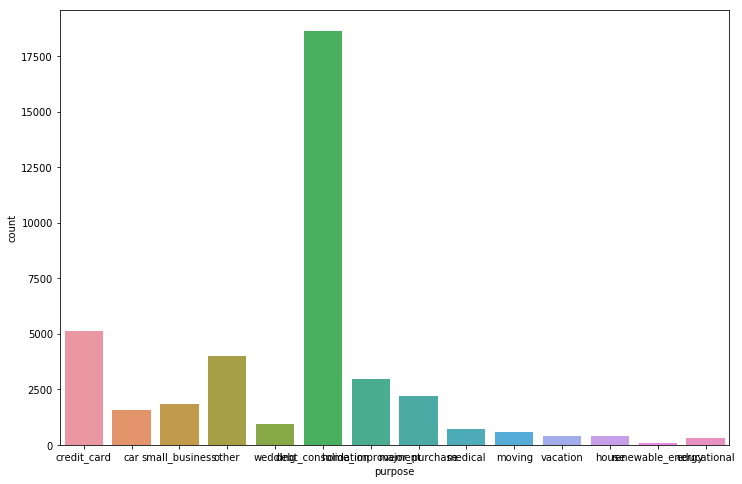

In [45]:
plt.figure(figsize=(12, 8))
countplt('purpose')

`we see that debt consolition is the purpose has majority of loans given`

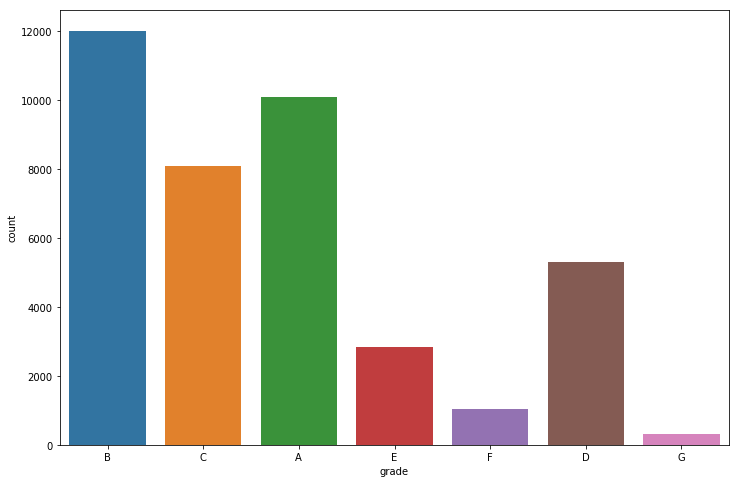

In [46]:
plt.figure(figsize=(12, 8))
countplt('grade')

As we see B Grade is having maximum loans given to

## Segmented univariate

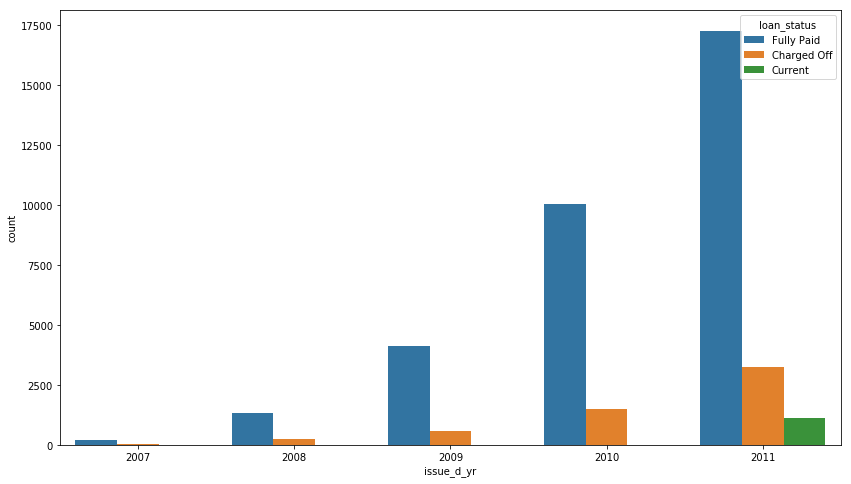

In [91]:
plt.figure(figsize=(14, 8))
sns.countplot(x='issue_d_yr',hue ='loan_status',data=loan_cd)

 As we see fully paid is completely dwarfing the the other types, we will further not include the Fully Paid for few analysis

In [92]:
# Count plot for charged off and current
def countplt(dim):
    sns.countplot(x=dim,data=loan_cd.loc[loan_cd['loan_status'] != 'Fully Paid'])

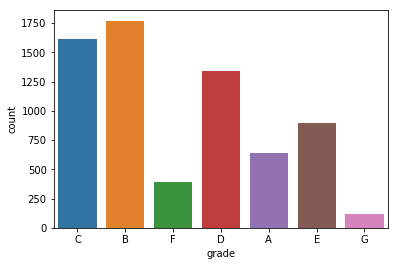

In [93]:
countplt('grade')

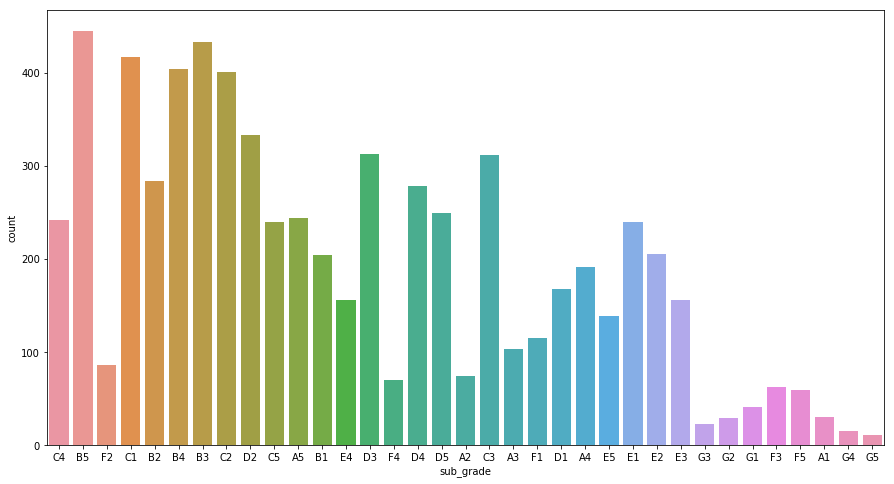

In [94]:
plt.figure(figsize=(15, 8))
countplt('sub_grade')

## Creating Derived metrics

These metrics will be used to plot against the purpose

### Creating derived metrics based on Business
Paid amount to Loan Amount Percentage Or Payback Percentage - This will be a % of amount of pricipal which is paid back,  without including the Interest rate

In [97]:
# Creating a Function for dynamically creating the Dataframes as per our required variable.
def pct_prncp_rcvd_func(var):
    df = loan_cd.groupby([var], as_index=False).agg({'loan_amnt':['sum'],'total_rec_prncp':['sum']})
    df.columns = [var,'tot_loan_amt','tot_rec_prncp_amt']
    df['pct_prncp_rcvd'] = 100*df['tot_rec_prncp_amt']/df['tot_loan_amt']
    return df.sort_values(by='pct_prncp_rcvd')

             purpose  tot_loan_amt  tot_rec_prncp_amt  pct_prncp_rcvd
11    small_business      24800975        18938150.25       76.360507
10  renewable_energy        897875          764922.16       85.192500
7            medical       5726725         4968626.75       86.762098
5              house       4980050         4324655.94       86.839609
9              other      32213975        27986964.98       86.878335


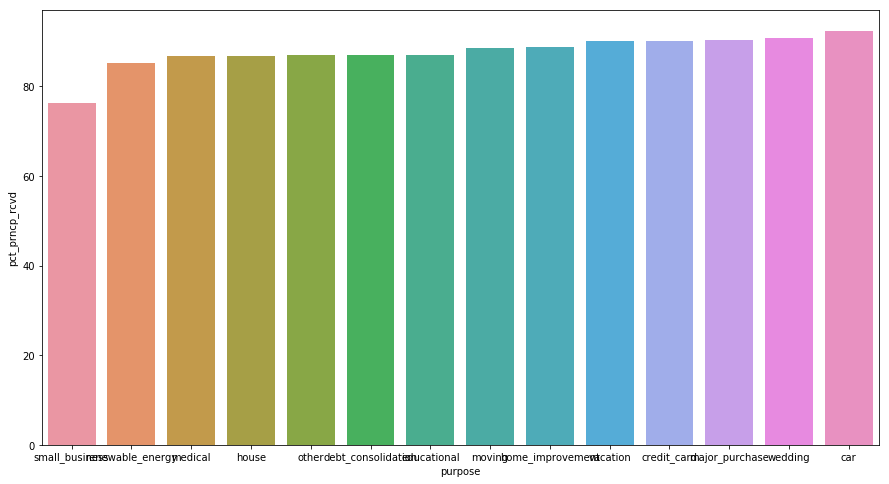

In [98]:
# 1. Analysis by Purpose
pct_prncp_rcvd_by_purpose = pct_prncp_rcvd_func('purpose')
print(pct_prncp_rcvd_by_purpose.head())
plt.figure(figsize=(15, 8))
sns.barplot(pct_prncp_rcvd_by_purpose.purpose, pct_prncp_rcvd_by_purpose.pct_prncp_rcvd)

As we see **Small Business** is having lowest Repayment percentage

  grade  tot_loan_amt  tot_rec_prncp_amt  pct_prncp_rcvd
5     F      19263100       1.405985e+07       72.988502
6     G       6391675       4.760439e+06       74.478739
4     E      45037900       3.529321e+07       78.363353
3     D      65160400       5.467050e+07       83.901426
2     C      89115825       7.730818e+07       86.750230
1     B     133651350       1.207284e+08       90.330843
0     A      86982400       8.214186e+07       94.435036


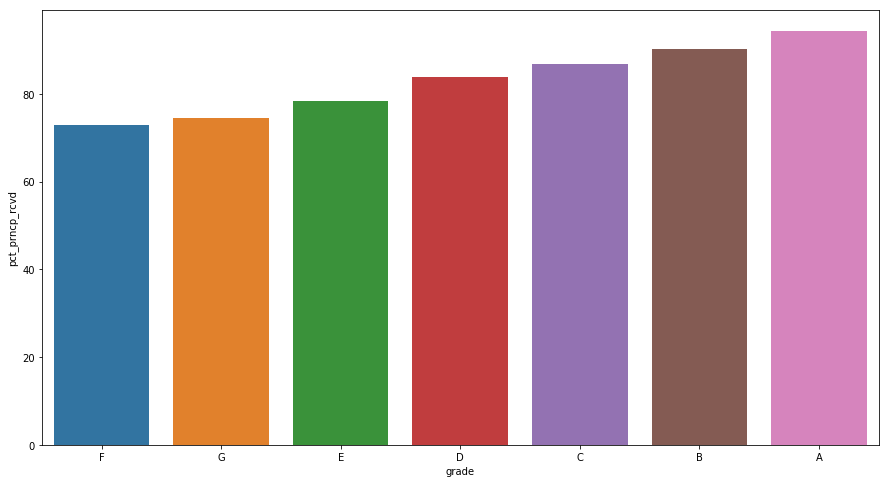

In [99]:
# 2. Analysis by Grade
pct_prncp_rcvd_by_grade = pct_prncp_rcvd_func('grade')
print(pct_prncp_rcvd_by_grade)
plt.figure(figsize=(15, 8))
sns.barplot(pct_prncp_rcvd_by_grade.grade, pct_prncp_rcvd_by_grade.pct_prncp_rcvd)

F and G are having low payback percentages

  home_ownership  tot_loan_amt  tot_rec_prncp_amt  pct_prncp_rcvd
2          OTHER       1044975       8.481463e+05       81.164272
0       MORTGAGE     224094000       1.953212e+08       87.160398
3            OWN      31365150       2.739106e+07       87.329603
4           RENT     189081725       1.653852e+08       87.467578
1           NONE         16800       1.679999e+04       99.999940


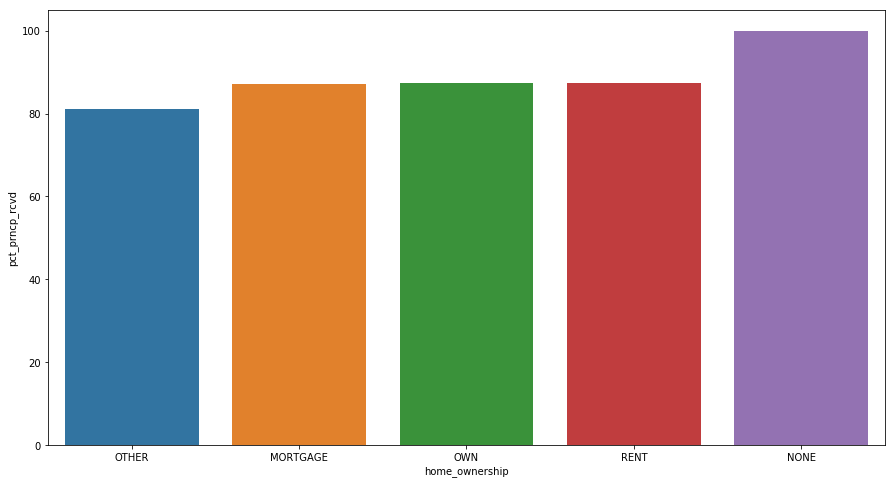

In [100]:
# 3. Analysis by Home Ownership
pct_prncp_rcvd_by_home_own = pct_prncp_rcvd_func('home_ownership')
print(pct_prncp_rcvd_by_home_own)
plt.figure(figsize=(15, 8))
sns.barplot(pct_prncp_rcvd_by_home_own.home_ownership, pct_prncp_rcvd_by_home_own.pct_prncp_rcvd)

Home Ownership shows interesting fact that Mortage, Own or Rented status of Homes almost have similar payback rate. The Other status is having lowest.

  int_rate_group  tot_loan_amt  tot_rec_prncp_amt  pct_prncp_rcvd
2      20 - 25 %      18214350       1.272996e+07       69.889740
1      15 - 20 %     107317575       8.680566e+07       80.886713
0      10 - 15 %     210184125       1.862178e+08       88.597470
3       5 - 10 %     109886600       1.032090e+08       93.923188


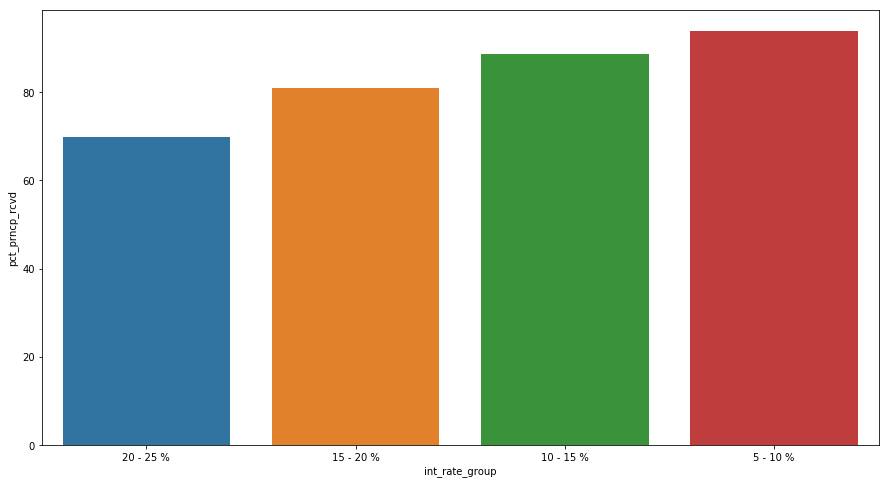

In [101]:
# 4. Analysis by Interest Rate Group
pct_prncp_rcvd_by_int_grp = pct_prncp_rcvd_func('int_rate_group')
print(pct_prncp_rcvd_by_int_grp)
plt.figure(figsize=(15, 8))
sns.barplot(pct_prncp_rcvd_by_int_grp.int_rate_group, pct_prncp_rcvd_by_int_grp.pct_prncp_rcvd)

People with 20 - 25% interest rate are having the lowest Payback index.

  verification_status  tot_loan_amt  tot_rec_prncp_amt  pct_prncp_rcvd
2            Verified     202236600       1.721134e+08       85.104960
1     Source Verified     100867000       8.819425e+07       87.436180
0        Not Verified     142499050       1.286548e+08       90.284676


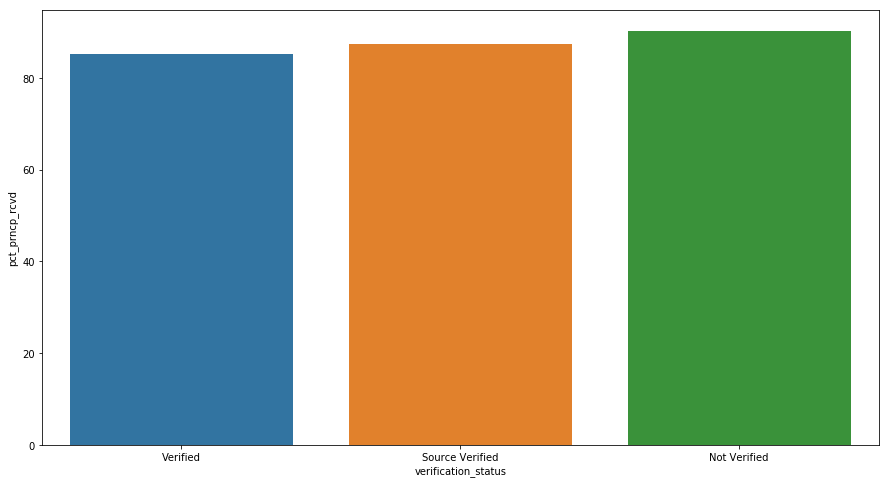

In [102]:
pct_prncp_rcvd_by_verify_stat = pct_prncp_rcvd_func('verification_status')
print(pct_prncp_rcvd_by_verify_stat)
plt.figure(figsize=(15, 8))
sns.barplot(pct_prncp_rcvd_by_verify_stat.verification_status, pct_prncp_rcvd_by_verify_stat.pct_prncp_rcvd)

**Verified** status having lowest payback percentage. This is a surprise, that though verification is done, still this group has lowest payback percentage

#### Another Derived Metric - Charged off Index

We're creating a new dervied metric - `Charged-Off Index`:
This index takes into account the distribution of users that are charged off and the distribution of the total population i.e. pct_charged_off / pct_total_population.
The reason for doing this is to ensure that we don't ignore the entire population set and just consider the charged_off/fully_paid users, as this will create a bias in case the population is skewed towards one entity

In [103]:
# Creating function to create the data frame with charged off index
def charged_off_ind_func(var):
    df=loan_cd.pivot_table(values = ['id'], index = [var],columns = ['loan_status'], aggfunc = 'count').reset_index()
    df.columns = [var,'charged_off_count','current_count','fully_paid_count']
    df.loc[pd.isnull(df.fully_paid_count),['fully_paid_count']] = 0
    df.loc[pd.isnull(df.charged_off_count),['charged_off_count']] = 0
    df.loc[pd.isnull(df.current_count),['current_count']] = 0
    df['total_pop'] = df['charged_off_count']+df['current_count']+df['fully_paid_count']
    df['pct_charged_off'] = df['charged_off_count']/df['charged_off_count'].sum()
    df['pct_tot_pop'] = df['total_pop']/df['total_pop'].sum()
    df['charged_off_index'] = round(df['pct_charged_off']/df['pct_tot_pop'],2)
    return df

In [104]:
# 1. Analysis of Charged off index by grade
loan_by_grade = charged_off_ind_func('grade')
loan_by_grade

,grade,charged_off_count,current_count,fully_paid_count,total_pop,pct_charged_off,pct_tot_pop,charged_off_index
0,A,602,40,9443,10085,0.106984,0.253921,0.42
1,B,1425,345,10250,12020,0.253243,0.302641,0.84
2,C,1347,264,6487,8098,0.239382,0.203893,1.17
3,D,1118,222,3967,5307,0.198685,0.133620,1.49
4,E,715,179,1948,2842,0.127066,0.071556,1.78
5,F,319,73,657,1049,0.056691,0.026412,2.15
6,G,101,17,198,316,0.017949,0.007956,2.26


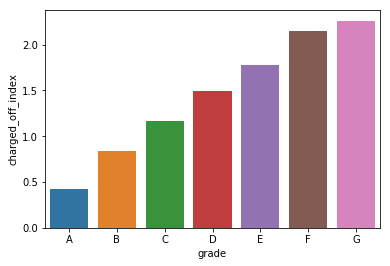

In [105]:
sns.barplot(x='grade', y ='charged_off_index', data=loan_by_grade)

So As the grade moves lower, the charged off index is higher, which increases the risk associated to loan repayment. Which means that the Grade G is having higher risk of being Charged Off

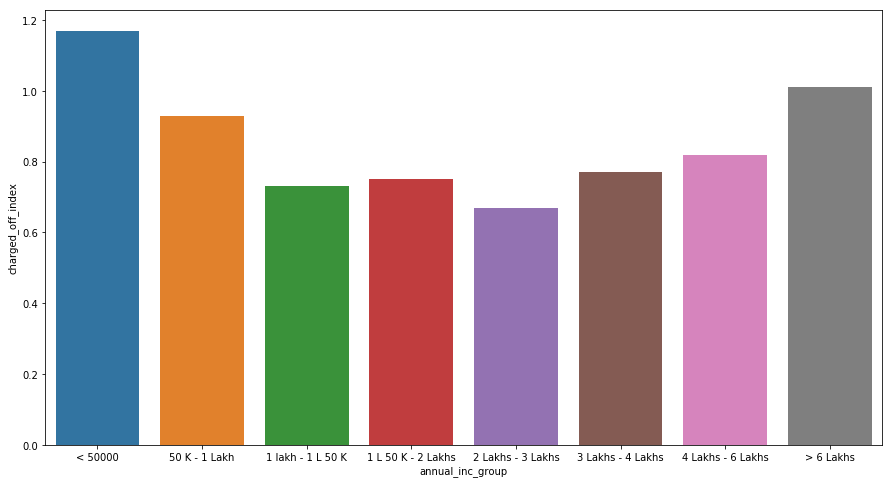

In [106]:
# 2. Analysis of Charged off index by Income group
loan_by_inc = charged_off_ind_func('annual_inc_group')
sort_order = ['< 50000','50 K - 1 Lakh','1 lakh - 1 L 50 K','1 L 50 K - 2 Lakhs','2 Lakhs - 3 Lakhs','3 Lakhs - 4 Lakhs','4 Lakhs - 6 Lakhs','> 6 Lakhs']
plt.figure(figsize=(15, 8))
sns.barplot(x='annual_inc_group', y ='charged_off_index', data=loan_by_inc, order=sort_order)

As we see, the Trend of Income is not having impact on Charged off Index

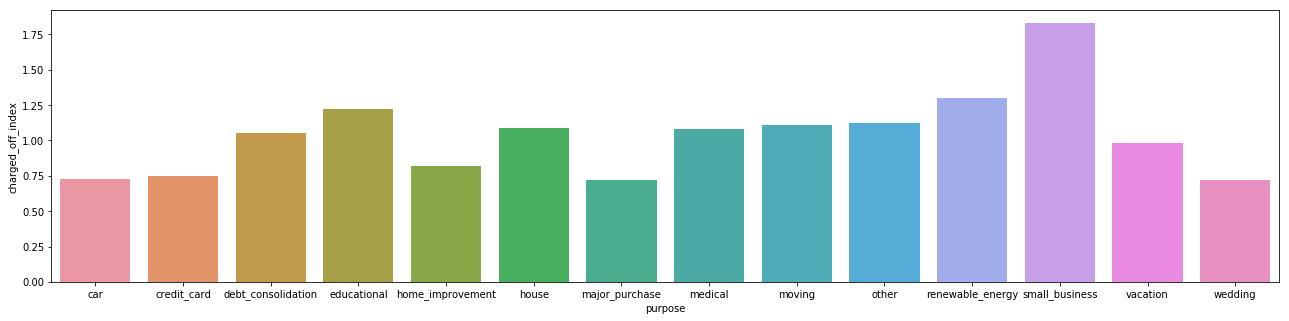

In [113]:
# 3. Analysis of Charged off index by Purpose
loan_by_purpose = charged_off_ind_func('purpose') 
loan_by_purpose
plt.figure(figsize=(22,5))
sns.barplot(x='purpose', y ='charged_off_index', data=loan_by_purpose)

As we can see **Small Business** is seen to be having more charged off index

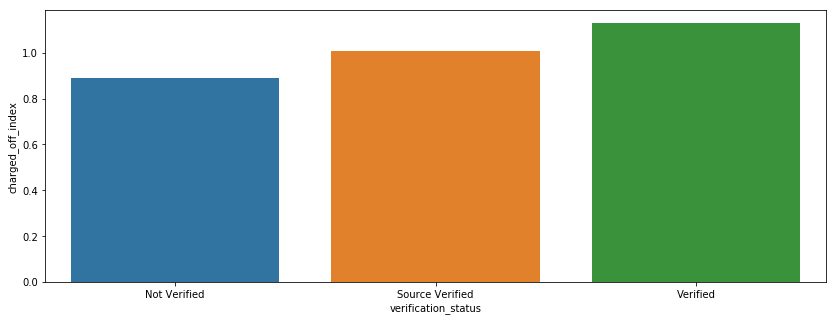

In [114]:
# 4. Analysis of Charged off index by Verification Status
loan_by_verify_stat = charged_off_ind_func('verification_status') 
plt.figure(figsize=(14,5))
sns.barplot(x='verification_status', y ='charged_off_index', data=loan_by_verify_stat)

The plot is showing increasing trend, for Verification status, with Highest risk of **Verified**

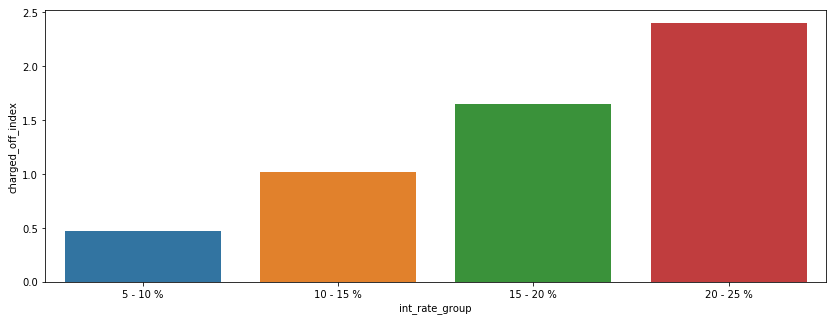

In [116]:
# 5. Analysis of Charged off index by Interest Group
loan_by_int_grp = charged_off_ind_func('int_rate_group')
plt.figure(figsize=(14,5))
sns.barplot(x='int_rate_group', y ='charged_off_index', data=loan_by_int_grp,order = ['5 - 10 %','10 - 15 %','15 - 20 %','20 - 25 %'])

The highest index is for Interest rate of **20 - 25 %**

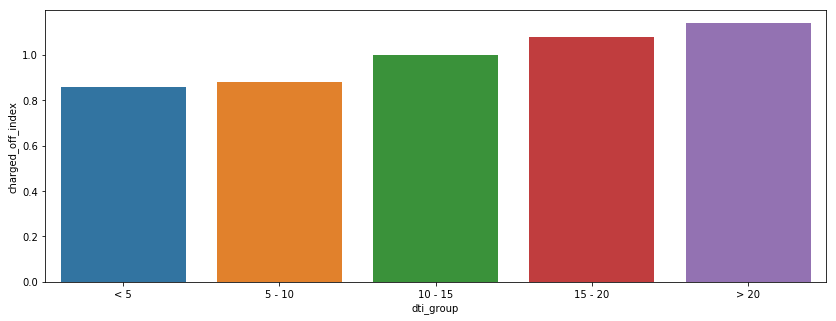

In [119]:
# 6. Analysis of Charged off index by Debt-Income Ratio Group
loan_by_dti_grp = charged_off_ind_func('dti_group')
plt.figure(figsize=(14,5))
sns.barplot(x='dti_group', y ='charged_off_index', data=loan_by_dti_grp,order=['< 5','5 - 10','10 - 15','15 - 20','> 20'])

The customers with Debt - Income ratio, with more than **> 20** looks to be having high charged off index, and hence can be considered as Risky category

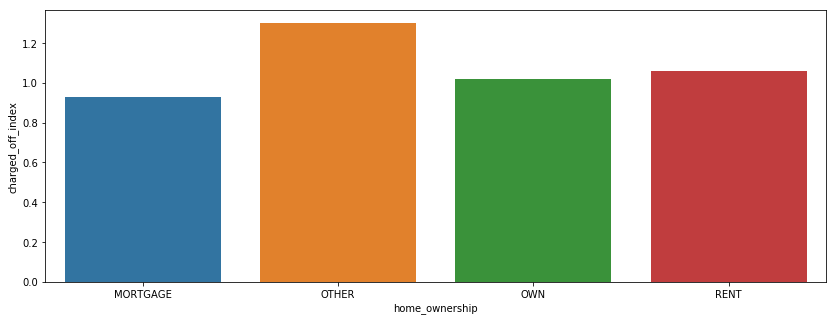

In [123]:
# 7. Analysis of Charged off index by Home Ownership
loan_by_hme_own = charged_off_ind_func('home_ownership') 
plt.figure(figsize=(14,5))
sns.barplot(x='home_ownership', y ='charged_off_index', data=loan_by_hme_own.loc[loan_by_hme_own['home_ownership']!='NONE'])
# As customers with home ownership status of 'None' are not being charged off, ignoring it for the plot

As we See - **Other** in the Home ownership is having highes charged off rate. Also, **Rent** category is next riskier sector

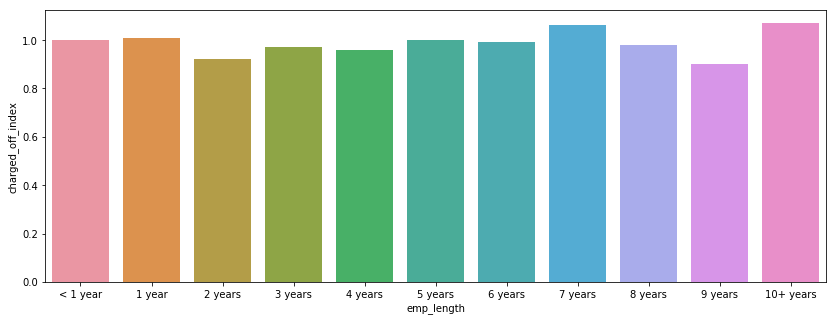

In [124]:
# 8. Analysis of Charged off index by Employee Length
loan_by_emp_lnth = charged_off_ind_func('emp_length')
sort_order = ['< 1 year','1 year','2 years','3 years','4 years','5 years',
'6 years','7 years','8 years','9 years','10+ years']
plt.figure(figsize=(14,5))
sns.barplot(x='emp_length', y ='charged_off_index', data=loan_by_emp_lnth,order=sort_order)

The difference is not much between the years of experience. However, The index is at highest for **10+ Years** experience category

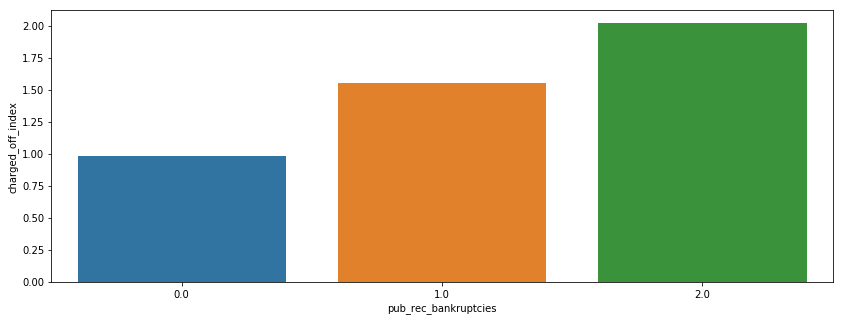

In [125]:
# 9. Analysis of Charged off index by Bankruptacy
loan_by_bnkrupt = charged_off_ind_func('pub_rec_bankruptcies')
plt.figure(figsize=(14,5))
sns.barplot(x='pub_rec_bankruptcies', y ='charged_off_index', data=loan_by_bnkrupt)

The bankruptacy index of **2.0** is having highest charged off Index

**To Summarize**
    The variables which are having high risk of being charged off are
        1. Grade, The lower the grade, higher the risk. `G Grade` had most risk.
        2. Among all purposes, **Small Business** was having high risk of having loan charged off.
        3. It is surprising that `verified` category is having most risk
        4. The highest index is for Intrest rate of 20 - 25 %
        5. Other in the Home ownership is having highes charged off rate. Also, Rent category is next riskier sector
        6. **2.0** index of bankruptacy is having most risk
    
    The variables which are not having impact on getting loan getting charged off are
        - Employee Experience Tenure
        - Income groups



## Bi-Variate Analysis

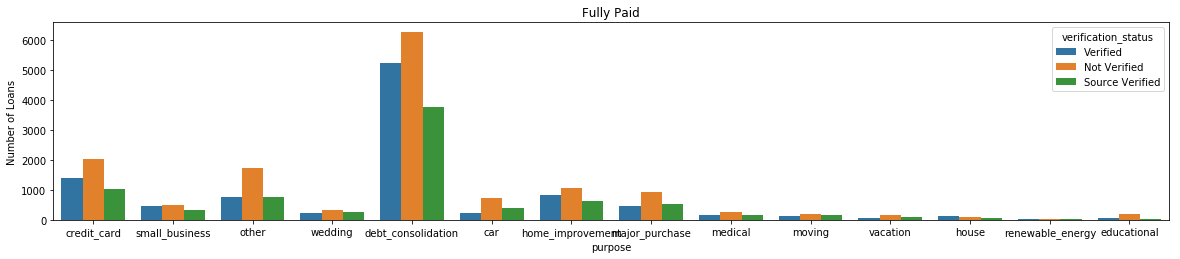

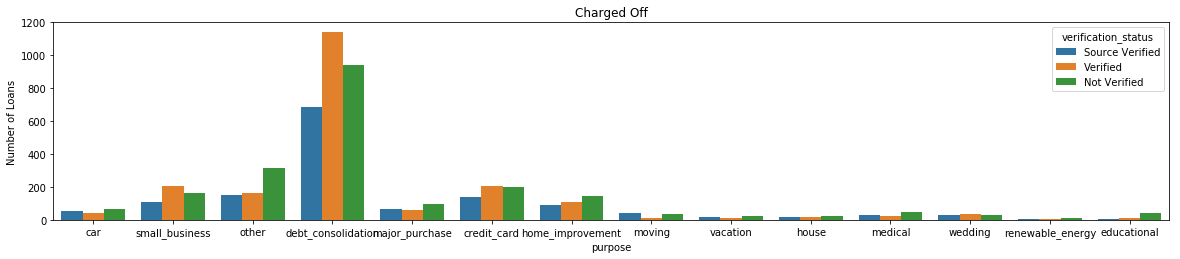

In [62]:
loan_cd_full_paid = loan_cd.loc[loan_cd["loan_status"]=="Fully Paid"]
loan_cd_charged_off = loan_cd.loc[loan_cd["loan_status"]=="Charged Off"]

plt.figure(figsize=(20, 8))
plt.subplot(2,1,1)
sns.barplot(x='purpose',y= "loan_amnt", hue = "verification_status", estimator=lambda x: len(x), data=loan_cd_full_paid, ci=None)
plt.title("Fully Paid")
plt.ylabel("Number of Loans")
plt.show()

plt.figure(figsize=(20,8))
plt.subplot(2,1,2)
sns.barplot(x='purpose',y= "loan_amnt", hue = "verification_status", estimator=lambda x: len(x), data=loan_cd_charged_off, ci=None)
plt.title("Charged Off")
plt.ylabel("Number of Loans")
plt.show()

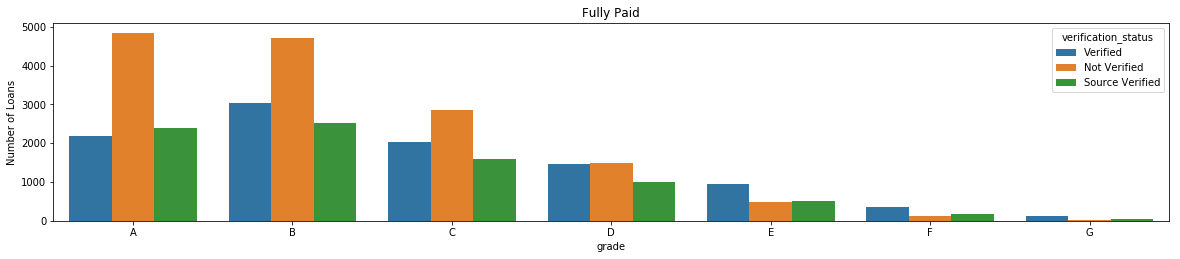

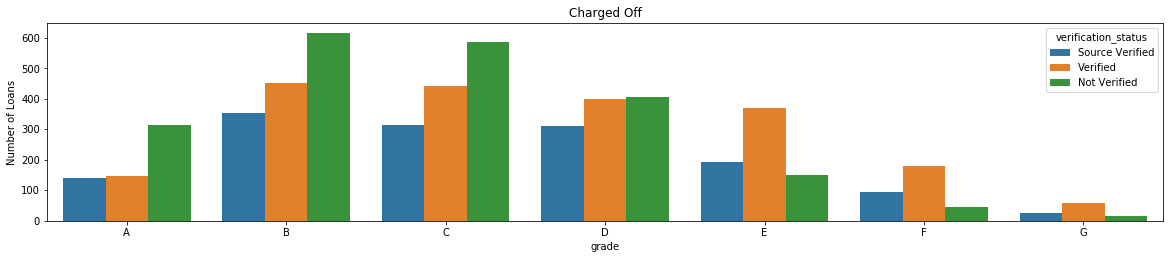

In [63]:
loan_cd_full_paid = loan_cd.loc[loan_cd["loan_status"]=="Fully Paid"]
loan_cd_charged_off = loan_cd.loc[loan_cd["loan_status"]=="Charged Off"]

plt.figure(figsize=(20, 8))
plt.subplot(2,1,1)
sns.barplot(x='grade',y= "loan_amnt", hue = "verification_status", estimator=lambda x: len(x), data=loan_cd_full_paid, ci=None, order=['A','B','C','D','E','F','G'])
plt.title("Fully Paid")
plt.ylabel("Number of Loans")
plt.show()

plt.figure(figsize=(20,8))
plt.subplot(2,1,2)
sns.barplot(x='grade',y= "loan_amnt", hue = "verification_status", estimator=lambda x: len(x), data=loan_cd_charged_off, ci=None, order=['A','B','C','D','E','F','G'])
plt.title("Charged Off")
plt.ylabel("Number of Loans")
plt.show()

Next, let's look at the relationship between each and every variable in our refined dataset. Here, we'll consider the correlation between two variables to understand whether any we can identify if there is large dependency of one independent variable with another independent variable or between an independent variable and the dependent  variable

In [64]:
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,term_in_months,emp_len_in_yrs,annual_inc_group,int_rate_group,issue_d_mnth,issue_d_yr,dti_group
0,1077501,1296599,5000,5000,4975.0,36 months,0.1065,162.87,B,B2,...,171.62,May-16,0.0,36,10.0,< 50000,10 - 15 %,12,2011,> 20
1,1077430,1314167,2500,2500,2500.0,60 months,0.1527,59.83,C,C4,...,119.66,Sep-13,0.0,60,0.0,< 50000,15 - 20 %,12,2011,< 5
2,1077175,1313524,2400,2400,2400.0,36 months,0.1596,84.33,C,C5,...,649.91,May-16,0.0,36,10.0,< 50000,15 - 20 %,12,2011,5 - 10
3,1076863,1277178,10000,10000,10000.0,36 months,0.1349,339.31,C,C1,...,357.48,Apr-16,0.0,36,10.0,< 50000,10 - 15 %,12,2011,15 - 20
4,1075358,1311748,3000,3000,3000.0,60 months,0.1269,67.79,B,B5,...,67.79,May-16,0.0,60,1.0,50 K - 1 Lakh,10 - 15 %,12,2011,15 - 20


In [65]:
loan_data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies', 'term_in_months', 'emp_len_in_yrs',
       'annual_inc_group', 'int_rate_group', 'issue_d_mnth', 'issue_d_yr',
       'dti_group'],
      dtype='object')

In [66]:
# Create a new dataframe with the select variables that we have narrowed down using the analysis done above.
# Also exclude the current loan status type, which leaves us with a binary dependent variable i.e either the loan was repayed or not
loan_data_bivariate = loan_data.loc[loan_data['loan_status']!="Current",['loan_amnt', 'funded_amnt', 'int_rate', 'installment', 'grade', 'home_ownership', 'annual_inc', 'verification_status',
       'loan_status','purpose', 'dti','pub_rec_bankruptcies', 'term_in_months', 'emp_len_in_yrs']]

In [67]:
loan_data_bivariate.head()

,loan_amnt,funded_amnt,int_rate,installment,grade,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,pub_rec_bankruptcies,term_in_months,emp_len_in_yrs
0,5000,5000,0.1065,162.87,B,RENT,24000.0,Verified,Fully Paid,credit_card,27.65,0.0,36,10.0
1,2500,2500,0.1527,59.83,C,RENT,30000.0,Source Verified,Charged Off,car,1.00,0.0,60,0.0
2,2400,2400,0.1596,84.33,C,RENT,12252.0,Not Verified,Fully Paid,small_business,8.72,0.0,36,10.0
3,10000,10000,0.1349,339.31,C,RENT,49200.0,Source Verified,Fully Paid,other,20.00,0.0,36,10.0
5,5000,5000,0.0790,156.46,A,RENT,36000.0,Source Verified,Fully Paid,wedding,11.20,0.0,36,3.0


In [68]:
loan_data_bivariate.dtypes

loan_amnt                 int64
funded_amnt               int64
int_rate                float64
installment             float64
grade                    object
home_ownership           object
annual_inc              float64
verification_status      object
loan_status              object
purpose                  object
dti                     float64
pub_rec_bankruptcies    float64
term_in_months            int64
emp_len_in_yrs          float64
dtype: object

In order to find the correlation for each variable with the other variable, we will need to encode all the categorical variables - this can be done using the label encoder from the sklearn library

In [69]:
from sklearn import preprocessing
# One hot Encoding
le = preprocessing.LabelEncoder()

In [70]:
# Using the above created encoder on each of the categorical variables
loan_data_bivariate['grade'] = le.fit_transform(loan_data_bivariate['grade'].values)
loan_data_bivariate['home_ownership'] = le.fit_transform(loan_data_bivariate['home_ownership'].values)
loan_data_bivariate['verification_status'] = le.fit_transform(loan_data_bivariate['verification_status'].values)
loan_data_bivariate['loan_status'] = le.fit_transform(loan_data_bivariate['loan_status'].values)
loan_data_bivariate['purpose'] = le.fit_transform(loan_data_bivariate['purpose'].values)

In [71]:
loan_data_bivariate.head()

,loan_amnt,funded_amnt,int_rate,installment,grade,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,pub_rec_bankruptcies,term_in_months,emp_len_in_yrs
0,5000,5000,0.1065,162.87,1,4,24000.0,2,1,1,27.65,0.0,36,10.0
1,2500,2500,0.1527,59.83,2,4,30000.0,1,0,0,1.00,0.0,60,0.0
2,2400,2400,0.1596,84.33,2,4,12252.0,0,1,11,8.72,0.0,36,10.0
3,10000,10000,0.1349,339.31,2,4,49200.0,1,1,9,20.00,0.0,36,10.0
5,5000,5000,0.0790,156.46,0,4,36000.0,1,1,13,11.20,0.0,36,3.0


In [72]:
loan_data_bivariate.dtypes

loan_amnt                 int64
funded_amnt               int64
int_rate                float64
installment             float64
grade                     int64
home_ownership            int64
annual_inc              float64
verification_status       int64
loan_status               int64
purpose                   int64
dti                     float64
pub_rec_bankruptcies    float64
term_in_months            int64
emp_len_in_yrs          float64
dtype: object

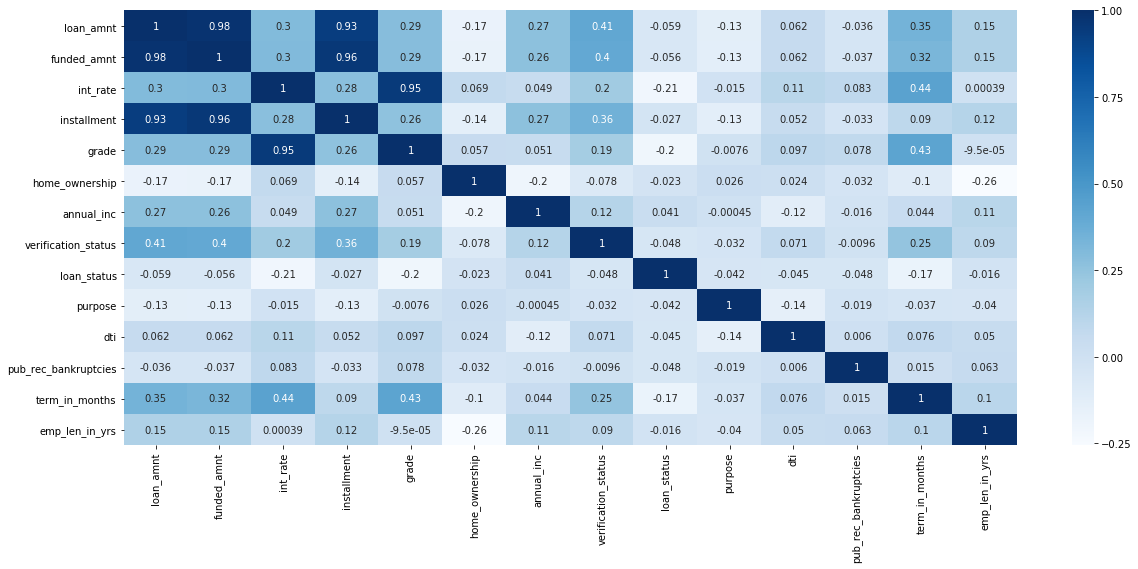

In [73]:
plt.figure(figsize=(20, 8))
corr = loan_data_bivariate.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            annot=True,
            cmap="Blues")

Looking at the correlation matrix above, we observe that the variables correlating the most with our dependent variable "loan_status" are: interest rate, grade, and month. However, all of these are at most mildly correlated with the dependent variable

Also, we are observing some really strong correlations between a few variabels (over 0.9). For these variables, we can drop one and choose the other as they would have similar impact on the dependent variable

-------------------------------------------------------------
#### Deep-dive analysis on charged off loans
Post the extensive univariate, segmented univariate and bi-variate analysis that we've done above, let's deep-dive into multiple combinations of data to extract more information which would help give a clearer picture of what the data is talking about

- Understanding the impact of verification status along with the loan purposes on the charged off loans

In [74]:
loan_co = loan_cd.loc[loan_cd.loan_status == 'Charged Off']
loan_co.purpose.value_counts().head(7)

debt_consolidation    2767
other                  633
credit_card            542
small_business         475
home_improvement       347
major_purchase         222
car                    160
Name: purpose, dtype: int64

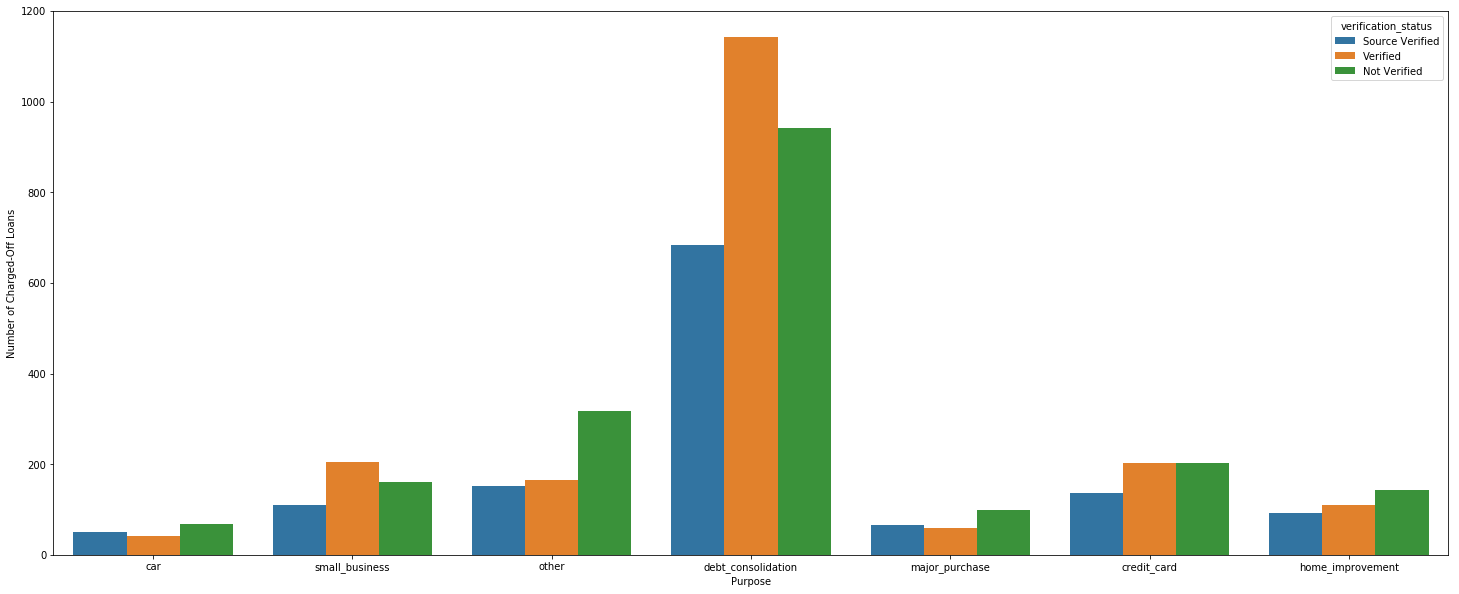

In [75]:
purposes = ['debt_consolidation','other','credit_card','small_business','home_improvement','major_purchase','car']
plt.figure(figsize=(25,10))
sns.barplot(x='purpose',y='loan_amnt',hue='verification_status', estimator=lambda x: len(x), data=loan_co.loc[loan_co.purpose.isin(purposes)])
plt.xlabel("Purpose")
plt.ylabel("Number of Charged-Off Loans")
plt.show()

From the above, we observe that verification status is clearly important for most of the loans given out for the purposes shown above as it reduces the risk of loans getting charged off

- Understanding the impact of verification status along with the grade on the charged off loans

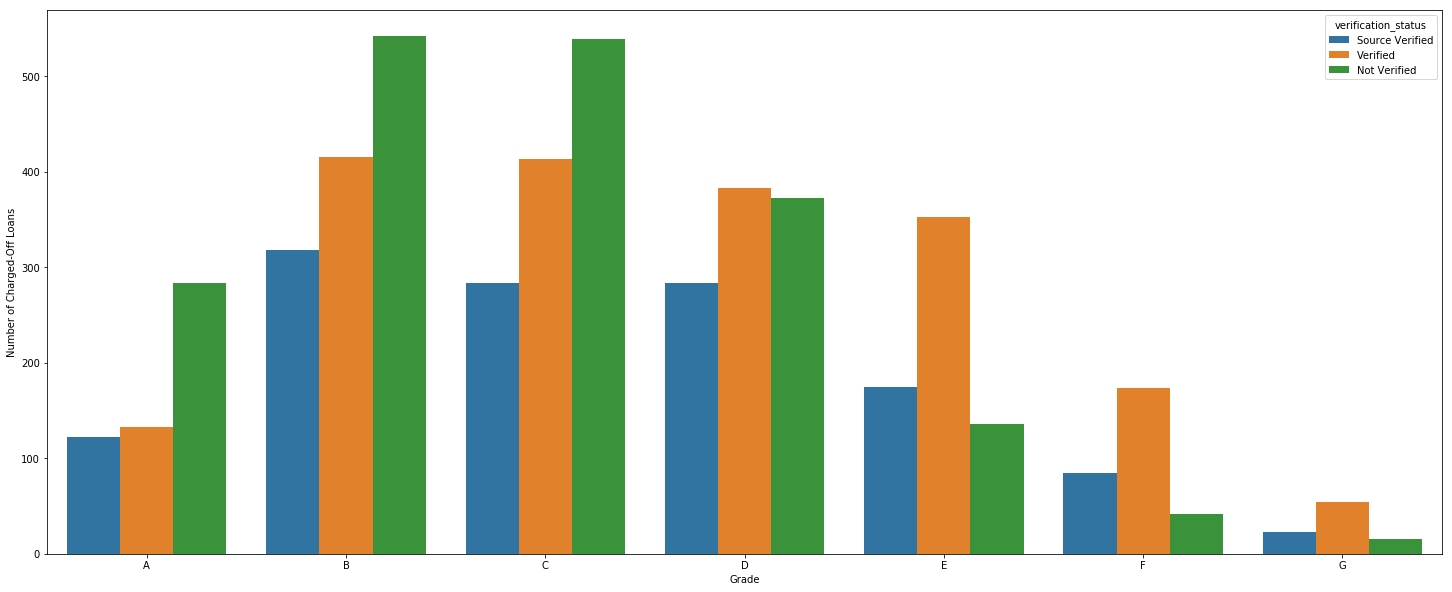

In [76]:
plt.figure(figsize=(25,10))
sns.barplot(x='grade',y='loan_amnt',hue='verification_status', estimator=lambda x: len(x), data=loan_co.loc[loan_co.purpose.isin(purposes)], order = ['A','B','C','D','E','F','G'])
plt.xlabel("Grade")
plt.ylabel("Number of Charged-Off Loans")
plt.show()

From the above, we understand that the number of charged off loans are greates for the B and C grade for the non-verified sources

### Summary and Insights

Based on the above analysis (post data cleaning, fixing columns and rows, univariate analysis, segmented univariate analysis, bivariate analysis) and using the new derived metric that we created (the **charged-off index**)along with the existing metrics and the dependent variable "loan status", we can draw the following topline insights: <br>
- among all the purposes, the 'Small Businesses' loan purpose is the riskiest with the highest Charged-off index, however the most loans are taken for the Debt Consolidation purpose
- we observe a trend in the 'Grade' variable, as the grade reduces, the risk of the loan getting defaulted increases
- the income levels isn't the most important variable in determing the chances of the loan getting defaulted or not as it doesn't follow any trend
- the data for verification is one that stands out as it goes against what one would expect: the loans with a verified status have a higher risk compared to not-verified ones. _Perhaps the firm should look to make the verification process more stringent to improve this_
- public bankruptcy level tells us that there is a high rate of loans getting defaulted for receivers who have a high number of bakruptcy. However, **94%** of the data provided was for users that had 0 numbers of public bakruptcy, hence actioning based on this wouldn't be advised due to population skewness
- For the home ownership variable, the **other** and **rent** are the riskiest home ownership types
- the employment length in years variable does not show to have any major impact on the chances of a loan getting charged-off
- as the interest rate increases, the rate at which the users default also increases. This, however, could be as a result of the action that the bank takes for charging higher interest rates to users that are assumed to be of high risk
- the DTI groups also have a direct impact on the rate at which loans get charged off. As the DTI rate increases, the loan gets morew riskier
<br>---------------<br>
Based on the above insights, we can narrow down to the following **most important factors** for judging whether a loan will be defaulted or not:
1. Purpose
2. Grade
3. Verification Status (this process needs to be looked into by the firm)
4. Home Ownership
5. Interest Rate
6. DTI
